### Coding Assignment: Train deep MLP on MNIST dataset.
#### Problem #4

### Import necessary packages and load MNIST dataset

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import tensorflow as tf
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, BatchNormalization

In [101]:
# Load MNIST dataset 
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

 ### Process Dataset

In [102]:
# Print train image @ zeroth index/ tensor - multi-dim array
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

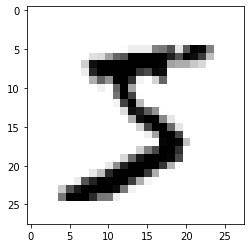

In [103]:
# Graph this data will result in the image at zeroth index
# as this handwritten dataset is in binary color format 
# cmap will show (black & white); it is not a color image
plt.imshow(train_images[0], cmap = plt.cm.binary)
plt.show()

In [104]:
train_images.shape 
#MNIST training set contains 60,000 grayscale images, each 28x28 pixels

(60000, 28, 28)

In [105]:
train_labels.shape 

(60000,)

In [106]:
test_labels.shape
#MNIST test set contains 10,000 labels

(10000,)

In [107]:
train_images.dtype # training images data type or pixel (28 x28) intensity is represented as a byte (0 to 255)

dtype('uint8')

In [108]:
# split the training data into valiadation set and a smaller training set while also scaling the pixel intesnisty to a 0 to 1 scale
# and convert them to float values

# TRAINING AND VALIDTION IMAGES
train_images_valid, train_images_new = train_images[:5000] / 255., train_images[5000:] / 255.
#[:5000] first 4,999 values or values @ idx positions 0 to 4,999 divided by [5000:] last 5,0000 values or values @ idx positions 5,0000 to end, in this case 60,000

# TRAINING AND VALIDATION LABELS
train_labels_valid, train_labels_new = train_labels[:5000], train_labels[5000:]
#[5000:] first 4,999 values or values @ idx positions 0 to 4,999 divided by [5000:] last 5,0000 values or values @ idx positions 5,0000 to end, in this case 60,000

# TEST IMAGES
# test images coverted to floats
test_images = test_images / 255.

In [109]:
train_images_new.shape # TRAINING IMAGES after val_split = 55,000

(55000, 28, 28)

In [110]:
train_images_valid.shape # VALIDATION IMAGES after val_split = 5,000

(5000, 28, 28)

In [111]:
train_labels_new.shape

(55000,)

In [112]:
train_labels_valid.shape

(5000,)

In [113]:
test_images.shape # TEST IMAGES REMAIN SAME =  10,000

(10000, 28, 28)

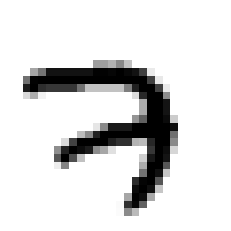

In [114]:
plt.imshow(train_images_new[0], cmap="binary")
plt.axis('off')
plt.show() # 7

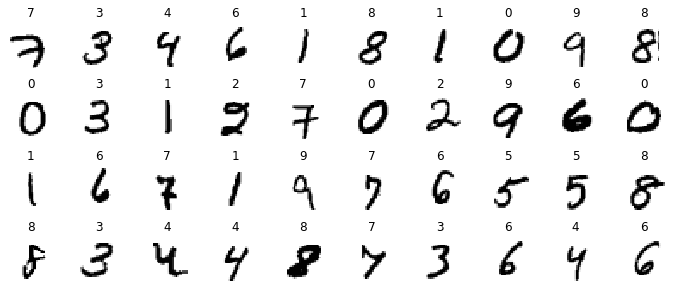

In [115]:
# SAMPLE IMAGES AND CORRESPONDING LABELS IN THE NEWLY CREATED TRAINING DATASET (POST VALIDATION SPLIT)

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(train_images_new[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(train_labels_new[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()



### Create and Train Model

In [116]:
###Find optimal learning rate

from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, BatchNormalization
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from keras.callbacks import Callback
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras import backend as K


In [117]:
### CREATE A MODEL

model = Sequential([
    layers.Flatten(input_shape=[28, 28]), # one input image with 28 x 28 , flattened to one d array
    layers.Dense(300, activation="relu"),
    layers.Dense(100, activation="relu"),
    layers.Dense(10, activation="softmax") # multi-output class of 10 
])

In [118]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_12 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [119]:
# Set Optimizer and change from default learning rate to 3e-1
opt = SGD(lr=3e-1)

# Compile model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'])

In [120]:
### TRAIN DATA with MODEL 

history = model.fit(train_images_new, train_labels_new, batch_size = 128, epochs=10,
                    validation_data=(train_images_valid, train_labels_valid)) 
# batch size defaults to 32, but has been changed to 128

Epoch 1/10
430/430 [==============================] - 1s 3ms/step - loss: 0.3200 - accuracy: 0.9033 - val_loss: 0.1354 - val_accuracy: 0.9618
Epoch 2/10
430/430 [==============================] - 1s 2ms/step - loss: 0.1225 - accuracy: 0.9632 - val_loss: 0.1179 - val_accuracy: 0.9668
Epoch 3/10
430/430 [==============================] - 1s 2ms/step - loss: 0.0852 - accuracy: 0.9741 - val_loss: 0.0924 - val_accuracy: 0.9718
Epoch 4/10
430/430 [==============================] - 1s 2ms/step - loss: 0.0616 - accuracy: 0.9814 - val_loss: 0.0973 - val_accuracy: 0.9714
Epoch 5/10
430/430 [==============================] - 1s 2ms/step - loss: 0.0478 - accuracy: 0.9853 - val_loss: 0.0660 - val_accuracy: 0.9802
Epoch 6/10
430/430 [==============================] - 1s 2ms/step - loss: 0.0373 - accuracy: 0.9887 - val_loss: 0.0652 - val_accuracy: 0.9818
Epoch 7/10
430/430 [==============================] - 1s 3ms/step - loss: 0.0286 - accuracy: 0.9915 - val_loss: 0.0673 - val_accuracy: 0.9820
Epoch 

### Test Model and Predictions

In [121]:
# TEST DATA WITH MODEL

# Calculate validaton loss and validation accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)
print('test_loss:', test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.0686 - accuracy: 0.9806
test_acc: 0.9805999994277954
test_loss: 0.06863896548748016


In [122]:
predictions = model.predict(x=test_images, batch_size= 10, verbose =0) # predictions

In [123]:
rounded_predictions = np.argmax(predictions, axis = -1) # round prediction values

### Classification report + Confusion matrix to view results 

In [124]:
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_true=test_labels, y_pred=rounded_predictions))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=test_labels, y_pred=rounded_predictions))

Classification report 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.99      0.97      0.98      1010
           4       0.96      0.99      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Confusion matrix 
[[ 972    1    1    0    2    0    3    1    0    0]
 [   0 1125    3    0    0    1    2    1    3    0]
 [   3    0 1013    0    5    0    2    5    4    0]
 [   1    0    8  984    0    7    0    3

### Plot Learning Curves

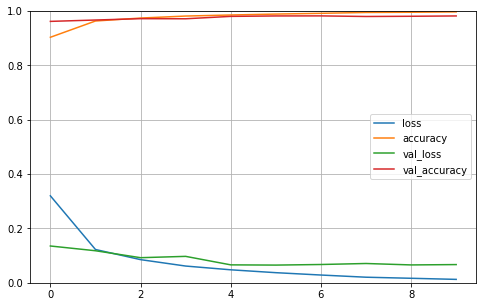

In [126]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set vertical range to [0,-1]
plt.show() 